In [3]:

import numpy as np
import matplotlib.pyplot as plt

import json
from tqdm.notebook import tqdm

from scipy import stats

import glob

from combra import data, angles
import os


In [ ]:
# json_data.append({'path': paths[i],
#                   'name': name,
#                   'type': types_dict[name],
#                   'legend': [text],
#                   'density_curve_scatter': [x,y],
#                   'gauss_approx_plot': [x_gauss, y_gauss],
#                   'gauss_approx_data': [{'mus': mus, 'sigmas':sigmas, 'amps':amps}],
#                   'angles_series': all_unique_angels,
#                   })

# W-dist 256x256

Directory tree:
├── N100.json
├── N250.json
└── N360.json
Processing and caching images...


Processing dataset images: 0it [00:00, ?it/s]
Processing angles (step=100°): 0it [00:00, ?it/s]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

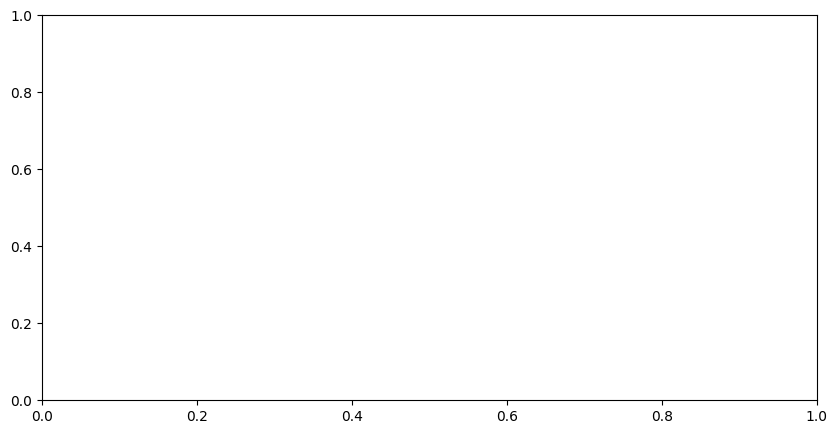

In [4]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

markers = ['v', 's', 'D', 'd', 'p', '*','P']
colors_1 = ['orange', 'red','blue','green', 'indigo', 'brown']

types_dict = {'Ultra_Co11': 'средние зерна',
              'Ultra_Co25': 'мелкие зерна',
              'Ultra_Co8': 'средне-мелкие зерна',
              'Ultra_Co6_2': 'крупные зерна',
              'Ultra_Co15': 'средне-мелкие зерна'}


############
# Generate #
############

# prepares on previus step 
ethalon_path = 'data/gen_256x256_5_degrees_24.09.2025/o_bc_left_4x_768_256x256_N360.json'

tmp = './tmp'

folder_paths=['data/gen_256x256_5_degrees_24.09.2025/o_bc_left_4x_768_256x256_N360',
              'data/gen_256x256_5_degrees_24.09.2025/o_bc_left_4x_768_360_median_rgb_256x256-gpus4-batch256_step23040_N10000',
              'data/gen_256x256_5_degrees_24.09.2025/o_bc_left_4x_768_360_median_rgb_256x256-gpus8-batch512_step53248_N10000',
              'data/gen_256x256_5_degrees_24.09.2025/o_bc_left_4x_768_360_median_rgb_256x256-gpus8-batch512_step94208_N10000',
              'data/gen_256x256_5_degrees_24.09.2025/o_bc_left_4x_768_360_median_rgb_256x256-gpus8-batch256_step63488_N10000']

class_indices=[[0, 1, 4],
               [0, 1, 2],
               [0, 1, 2],
               [0, 1, 2],
               [0, 1, 2]]

steps = [100, 250, 360, 500, 1000, 10000]

os.makedirs("tmp", exist_ok=True)

for folder_path in folder_paths:
    os.makedirs(tmp+'/'+folder_path.split('/')[1], exist_ok=True)
    for step in steps:
        json_save_name = tmp+'/'+folder_path.split('/')[1]+f'/'+f'{step}.json'
        angles.angles_approx_save(
                    images_path=folder_path,
                    save_path=json_save_name,
                    types_dict=types_dict,
                    step=step,
                    max_images_num_per_class=360, 
                    workers = 20
                )




In [ ]:


folder_path = 'data/gen_256x256_5_degrees_24.09.2025/o_bc_left_4x_768_256x256_N360'
jsons_names = glob.glob(folder_path+'/*.json')


ethalon_dist = json.load(open(ethalon_name,encoding='utf-8'))

# iterate class types for real images
legends=[]
for i, idx in enumerate(indices_1):
    tmp_x=[]
    tmp_y=[]
    for name in jsons_names:
        data = json.load(open(name,encoding='utf-8'))
        y_fake = data[idx]['density_curve_scatter'][1]
        w_dist = stats.wasserstein_distance(y_fake, ethalon_dist[idx]['density_curve_scatter'][1])
        N=int(name.split('/')[-1].split('.')[0][1:])
        tmp_x.append(N)
        tmp_y.append(w_dist)
        class_name = data[idx]['name']
    # legends.append(class_name + ' '+names_dict[class_name])
    legends.append('original images')
    plt.plot(tmp_x, tmp_y, '-o')

######

Ns=np.array([100, 200, 500, 1000, 10000])

plt.plot(Ns, 1/(np.sqrt(Ns)*100), '-o')

legends.extend([f'$10^{-2}/(sqrt(N))$'])

######

folders = ['data/gen_256x256_5_degrees_24.09.2025/o_bc_left_4x_768_360_median_rgb_256x256-gpus4-batch256_step23040_N10000',
           'data/gen_256x256_5_degrees_24.09.2025/o_bc_left_4x_768_360_median_rgb_256x256-gpus8-batch512_step53248_N10000',
           'data/gen_256x256_5_degrees_24.09.2025/o_bc_left_4x_768_360_median_rgb_256x256-gpus8-batch512_step94208_N10000',
           'data/gen_256x256_5_degrees_24.09.2025/o_bc_left_4x_768_360_median_rgb_256x256-gpus8-batch256_step63488_N10000']

gan_legends=['01_gan_4gpu_step23040_fid173_days6', 
             '02_gan_8gpu_step53248_fid155_days11', 
             '02_gan_8gpu_step94208_fid181_days11',
             '03_gan_8gpu_step63488_fid155_days11']

legends.extend(gan_legends)
for i, folder in enumerate(folders):
    jsons_names = glob.glob(folder+'/*.json')
    tmp_x=[]
    tmp_y=[]
    for name in jsons_names:
        data = json.load(open(name,encoding='utf-8'))
        y_fake = data[0]['density_curve_scatter'][1]
        w_dist = stats.wasserstein_distance(y_fake, ethalon_dist[0]['density_curve_scatter'][1])
        N=int(name.split('/')[-1].split('.')[0][1:])
        tmp_x.append(N)
        tmp_y.append(w_dist)
    indices=np.argsort(tmp_x)
    tmp_x = np.array(tmp_x)
    tmp_y = np.array(tmp_y)
    plt.plot(tmp_x[indices], tmp_y[indices], '-o', color=colors_1[i], marker=markers[i])


######

folders = ['data/gen_256x256_5_degrees_24.09.2025/diff_o_bc_left_4x_768_360_256_median_N500',]

dif_legends=['diff_100epochs_days0.16']

for i, folder in enumerate(folders):
    jsons_names = glob.glob(folder+'/*.json')
    tmp_x=[]
    tmp_y=[]
    for name in jsons_names:
        data = json.load(open(name,encoding='utf-8'))
        y_fake = data[0]['density_curve_scatter'][1]
        w_dist = stats.wasserstein_distance(y_fake, ethalon_dist[0]['density_curve_scatter'][1])
        N=int(name.split('/')[-1].split('.')[0][1:])
        tmp_x.append(N)
        tmp_y.append(w_dist)
    legends.extend(dif_legends)
    indices=np.argsort(tmp_x)
    tmp_x = np.array(tmp_x)
    tmp_y = np.array(tmp_y)
    # plt.plot(tmp_x[indices], tmp_y[indices], '-o', color=colors_1[i], marker=markers[i])
    plt.plot(tmp_x[indices], tmp_y[indices], '-o')


######


plt.legend(legends)
plt.xscale("log")
# plt.yscale("log")
plt.ylabel('Wasserstein distance')
plt.xlabel('Number of images')
plt.title('Ultra_Co11 средние зерна 256x256')

plt.savefig('sampling_wdist_o_bc_left_4x_768_256x256_compare.png', bbox_inches='tight')

plt.show()

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
# fig, axes = plt.subplots(1,3,figsize=(N, M))

markers = ['v', 's', 'D', 'd', 'p', '*','P']
colors_1 = ['orange', 'red','blue','green', 'indigo', 'brown']
# colors_2 = ['olive', 'cyan','pink','purple', 'blue', 'lime']

#     colors_1 = ['orange', 'red','blue','green', 'indigo', 'brown']
#     colors_2 = ['olive', 'pink','pink','purple', 'blue', 'lime']

# sub_titles = ['Large grain','Medium grain ','Small grain' ]

names_dict = {'Ultra_Co11': 'средние зерна',
              'Ultra_Co25': 'мелкие зерна',
              'Ultra_Co8': 'средне-мелкие зерна',
              'Ultra_Co6_2': 'крупные зерна',
              'Ultra_Co15': 'средне-мелкие зерна'}



######
# Real images

# indices_1= [0, 1, 4]

indices_1= [1]

folder_path = 'data/gen_256x256_5_degrees_24.09.2025/o_bc_left_4x_768_256x256_N360'
jsons_names = glob.glob(folder_path+'/*.json')

ethalon_name = 'data/gen_256x256_5_degrees_24.09.2025/o_bc_left_4x_768_256x256_N360.json'
ethalon_dist = json.load(open(ethalon_name,encoding='utf-8'))

# iterate class types for real images
legends=[]
for i, idx in enumerate(indices_1):
    tmp_x=[]
    tmp_y=[]
    for name in jsons_names:
        data = json.load(open(name,encoding='utf-8'))
        y_fake = data[idx]['density_curve_scatter'][1]
        w_dist = stats.wasserstein_distance(y_fake, ethalon_dist[idx]['density_curve_scatter'][1])
        N=int(name.split('/')[-1].split('.')[0][1:])
        tmp_x.append(N)
        tmp_y.append(w_dist)
        class_name = data[idx]['name']
    # legends.append(class_name + ' '+names_dict[class_name])
    legends.append('original images')
    plt.plot(tmp_x, tmp_y, '-o')

######

Ns=np.array([100, 200, 500, 1000, 10000])

plt.plot(Ns, 1/(np.sqrt(Ns)*100), '-o')

legends.extend([f'$10^{-2}/(sqrt(N))$'])

######

folders = ['data/gen_256x256_5_degrees_24.09.2025/o_bc_left_4x_768_360_median_rgb_256x256-gpus4-batch256_step23040_N10000',
           'data/gen_256x256_5_degrees_24.09.2025/o_bc_left_4x_768_360_median_rgb_256x256-gpus8-batch512_step53248_N10000',
           'data/gen_256x256_5_degrees_24.09.2025/o_bc_left_4x_768_360_median_rgb_256x256-gpus8-batch512_step94208_N10000',
           'data/gen_256x256_5_degrees_24.09.2025/o_bc_left_4x_768_360_median_rgb_256x256-gpus8-batch256_step63488_N10000']

gan_legends=['01_gan_4gpu_step23040_fid173_days6', 
             '02_gan_8gpu_step53248_fid155_days11', 
             '02_gan_8gpu_step94208_fid181_days11',
             '03_gan_8gpu_step63488_fid155_days11']

legends.extend(gan_legends)
for i, folder in enumerate(folders):
    jsons_names = glob.glob(folder+'/*.json')
    tmp_x=[]
    tmp_y=[]
    for name in jsons_names:
        data = json.load(open(name,encoding='utf-8'))
        y_fake = data[0]['density_curve_scatter'][1]
        w_dist = stats.wasserstein_distance(y_fake, ethalon_dist[0]['density_curve_scatter'][1])
        N=int(name.split('/')[-1].split('.')[0][1:])
        tmp_x.append(N)
        tmp_y.append(w_dist)
    indices=np.argsort(tmp_x)
    tmp_x = np.array(tmp_x)
    tmp_y = np.array(tmp_y)
    plt.plot(tmp_x[indices], tmp_y[indices], '-o', color=colors_1[i], marker=markers[i])


######

folders = ['data/gen_256x256_5_degrees_24.09.2025/diff_o_bc_left_4x_768_360_256_median_N500',]

dif_legends=['diff_100epochs_days0.16']

for i, folder in enumerate(folders):
    jsons_names = glob.glob(folder+'/*.json')
    tmp_x=[]
    tmp_y=[]
    for name in jsons_names:
        data = json.load(open(name,encoding='utf-8'))
        y_fake = data[0]['density_curve_scatter'][1]
        w_dist = stats.wasserstein_distance(y_fake, ethalon_dist[0]['density_curve_scatter'][1])
        N=int(name.split('/')[-1].split('.')[0][1:])
        tmp_x.append(N)
        tmp_y.append(w_dist)
    legends.extend(dif_legends)
    indices=np.argsort(tmp_x)
    tmp_x = np.array(tmp_x)
    tmp_y = np.array(tmp_y)
    # plt.plot(tmp_x[indices], tmp_y[indices], '-o', color=colors_1[i], marker=markers[i])
    plt.plot(tmp_x[indices], tmp_y[indices], '-o')


######


plt.legend(legends)
plt.xscale("log")
# plt.yscale("log")
plt.ylabel('Wasserstein distance')
plt.xlabel('Number of images')
plt.title('Ultra_Co11 средние зерна 256x256')

plt.savefig('sampling_wdist_o_bc_left_4x_768_256x256_compare.png', bbox_inches='tight')

plt.show()

# W-dist diff 

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10), gridspec_kw={'hspace': 0.4})

markers = ['v', 's', 'D', 'd', 'p', '*','P']
colors_1 = ['orange', 'red','blue','green', 'indigo', 'brown']

names_dict = {'Ultra_Co11': 'средние зерна',
              'Ultra_Co25': 'мелкие зерна',
              'Ultra_Co8': 'средне-мелкие зерна',
              'Ultra_Co6_2': 'крупные зерна',
              'Ultra_Co15': 'средне-мелкие зерна'}


# shape = (256, 256)

# real_folder_path = 'data/gen_256x256_5_degrees_24.09.2025/o_bc_left_4x_768_256x256_N360'
# ethalon_json_path = 'data/gen_256x256_5_degrees_24.09.2025/o_bc_left_4x_768_256x256_N360.json'
# generated_folder_path = 'data/gen_256x256_5_degrees_24.09.2025/diff_o_bc_left_4x_768_360_256_median_N500'

# shape = (512, 512)

# real_folder_path = 'data/gen_512x512_5_degrees_24.09.2025/o_bc_left_4x_768_512x512_N360'
# ethalon_json_path = 'data/gen_512x512_5_degrees_24.09.2025/o_bc_left_4x_768_512x512_N360.json'
# generated_folder_path = 'data/gen_512x512_5_degrees_24.09.2025/diff_o_bc_left_4x_768_360_512_median_N500'

shape = (768, 768)

real_folder_path = 'data/gen_768x768_5_degrees_24.09.2025/o_bc_left_4x_768_768x768_N360'
ethalon_json_path = 'data/gen_768x768_5_degrees_24.09.2025/o_bc_left_4x_768_768x768_N360.json'
generated_folder_path = 'data/gen_768x768_5_degrees_24.09.2025/diff_o_bc_left_4x_768_360_768_median_N5000'


real_jsons_names = glob.glob(real_folder_path+'/*.json')
ethalon_json = json.load(open(ethalon_json_path,encoding='utf-8'))
generated_jsons_names = glob.glob(generated_folder_path+'/*.json')

dif_legends=['diff_100epochs_days0.16',
             'diff_100epochs_days0.71',
             'diff_100epochs_days1.52',
            ]

dif_legends=[dif_legends[2]]*3

# fake
indices_1 = [0, 1, 2]

# real
indices_2 = [0, 1, 4] 

# iterate class types - small, medium, large
for i, (idx_1, idx_2) in enumerate(zip(indices_1, indices_2)):
    # real images
    legends=[]

    tmp_x=[]
    tmp_y=[]
    for name in real_jsons_names:
        real_data = json.load(open(name,encoding='utf-8'))
        y_fake = real_data[idx_2]['density_curve_scatter'][1]
        w_dist = stats.wasserstein_distance(y_fake, ethalon_json[idx_2]['density_curve_scatter'][1])
        N=int(name.split('/')[-1].split('.')[0][1:])
        tmp_x.append(N)
        tmp_y.append(w_dist)
        class_name = real_data[idx_1]['name']
    # legends.append(class_name + ' '+names_dict[class_name])
    legends.append('original images')
    axes[i].plot(tmp_x, tmp_y, '-o')

    ######

    Ns=np.array([100, 200, 500, 1000, 10000])
    axes[i].plot(Ns, 1/(np.sqrt(Ns)*100), '-o')
    legends.extend([f'$10^{-2}/(sqrt(N))$'])

    ######

    tmp_x=[]
    tmp_y=[]
    for name in generated_jsons_names:
        generated_data = json.load(open(name,encoding='utf-8'))
        y_fake = generated_data[idx_1]['density_curve_scatter'][1]
        w_dist = stats.wasserstein_distance(y_fake, ethalon_json[idx_2]['density_curve_scatter'][1])
        N=int(name.split('/')[-1].split('.')[0][1:])
        tmp_x.append(N)
        tmp_y.append(w_dist)
    legends.append(dif_legends[i])
    indices=np.argsort(tmp_x)
    tmp_x = np.array(tmp_x)
    tmp_y = np.array(tmp_y)
    # plt.plot(tmp_x[indices], tmp_y[indices], '-o', color=colors_1[i], marker=markers[i])
    axes[i].plot(tmp_x[indices], tmp_y[indices], '-o')


    ######


    axes[i].legend(legends)
    axes[i].set_xscale("log")
    # axes[i].yscale("log")
    axes[i].set_ylabel('Wasserstein distance')
    axes[i].set_xlabel('Number of images')

    axes[i].set_title(f'{ethalon_json[idx_2]["name"]} {names_dict[ethalon_json[idx_2]["name"]]} {shape[0]}x{shape[1]}')


# plt.savefig('sampling_wdist_o_bc_left_4x_768_256x256_diff.png', bbox_inches='tight')
# plt.savefig('sampling_wdist_o_bc_left_4x_768_512x512_diff.png', bbox_inches='tight')
plt.savefig('sampling_wdist_o_bc_left_4x_768_768x768_diff.png', bbox_inches='tight')

plt.show()